#Final Project


In [ ]:
# Import modules 
# Data manipulations
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames

#Statistical models
import statsmodels as stats
import statsmodels.api as sm

#Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Others
import io
import os
import random
import copy
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading elections 2019 april city data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

df_apr_2019_city_raw = pd.read_csv(io.BytesIO(uploaded['vote_per_city_apr_2019.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# change the names of the top parties
df_apr_2019_city_raw = df_apr_2019_city_raw.rename(columns={"ז":"זהות","ג":'יהדות התורה','ל':'ישראל ביתנו','ום':'חדש-תעל','דעם':'רעם-בלד','אמת':'העבודה','מחל':'הליכוד','פה':'כחול לבן','טב':'איחוד מפלגות הימין',"כ":"כולנו","נ":"הימין החדש"})
df_apr_2019_city_raw = df_apr_2019_city_raw.drop(["מעטפות חיצוניות"]) #remove "מעטפות חיצוניות"
df_apr_city_2019 = df_apr_2019_city_raw[df_apr_2019_city_raw.columns[5:]] # removing "metadata" columns

Saving vote_per_city_apr_2019.csv to vote_per_city_apr_2019 (2).csv


In [ ]:
#Loading elections 2019 april kalpi data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

df_apr_2019_kalpi_raw = pd.read_csv(io.BytesIO(uploaded['vote_per_kalpi_apr_2019.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# change the names of the top parties
df_apr_2019_kalpi_raw = df_apr_2019_kalpi_raw.rename(columns={"מספר קלפי":"קלפי","ז":"זהות","ג":'יהדות התורה','ל':'ישראל ביתנו','ום':'חדש-תעל','דעם':'רעם-בלד','אמת':'העבודה','מחל':'הליכוד','פה':'כחול לבן','טב':'איחוד מפלגות הימין',"כ":"כולנו","נ":"הימין החדש"})
df_apr_2019_kalpi_raw = df_apr_2019_kalpi_raw.drop(["מעטפות חיצוניות"]) #remove "מעטפות חיצוניות"
df_apr_2019 = df_apr_2019_kalpi_raw[df_apr_2019_kalpi_raw.columns[6:]] # removing "metadata" columns
df_apr_14_kalpi= df_apr_2019[["יהדות התורה", "ישראל ביתנו", 'חדש-תעל','רעם-בלד',"הליכוד" ,"כחול לבן","העבודה","איחוד מפלגות הימין","שס","מרצ","הימין החדש","כולנו","זהות","נר"]]

Saving vote_per_kalpi_apr_2019.csv to vote_per_kalpi_apr_2019 (3).csv


In [ ]:
# Loading elections september 2019 city :
if run_in_colab:
    from google.colab import files
    uploaded = files.upload() 

data_type = "city" 
df_2019_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2019.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# change the names of the top parties
df_2019_raw = df_2019_raw.rename(columns={"כף":"עוצמה יהודית","ג":'יהדות התורה','ל':'ישראל ביתנו','ודעם':'הרשימה המשותפת','אמת':'העבודה גשר','מחל':'הליכוד','פה':'כחול לבן','טב':'ימינה',"מרצ":"המחנה הדמוקרטי"})
df_2019_raw = df_2019_raw.drop(["מעטפות חיצוניות"]) #remove "מעטפות חיצוניות"
df_2019 = df_2019_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2019 = df_2019[df_2019.columns[5:]] # removing "metadata" columns
#vector for the biggest parties and names
names_sep_2019 = ['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר', 'ימינה', 'שס',"המחנה הדמוקרטי","עוצמה יהודית"]
df_sep_9_city= df_2019[["יהדות התורה", "ישראל ביתנו", "הרשימה המשותפת","הליכוד" ,"כחול לבן","העבודה גשר","ימינה","שס","המחנה הדמוקרטי"]]

Saving votes per city 2019.csv to votes per city 2019 (2).csv


In [ ]:
# Loading elections september 2019 kalpi:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

df_2019_kalpi_raw = pd.read_csv(io.BytesIO(uploaded['vote_per_kalpi_2019.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')

# change the names of the top parties
df_2019_kalpi_raw = df_2019_kalpi_raw.rename(columns={"כף":"עוצמה יהודית","ג":'יהדות התורה','ל':'ישראל ביתנו','ודעם':'הרשימה המשותפת','אמת':'העבודה גשר','מחל':'הליכוד','פה':'כחול לבן','טב':'ימינה',"מרצ":"המחנה הדמוקרטי"})
df_2019_kalpi_raw = df_2019_kalpi_raw.drop(["מעטפות חיצוניות"]) #remove "מעטפות חיצוניות"
df_2019_kalpi = df_2019_kalpi_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2019_kalpi = df_2019_kalpi[df_2019_kalpi.columns[9:]] # removing "metadata" columns
#vector for the biggest parties
df_sep_9_kalpi= df_2019_kalpi[["יהדות התורה", "ישראל ביתנו", "הרשימה המשותפת","הליכוד" ,"כחול לבן","העבודה גשר","ימינה","שס","המחנה הדמוקרטי"]]

Saving vote_per_kalpi_2019.csv to vote_per_kalpi_2019 (2).csv


In [ ]:
# Loading elections 2020 elections city data :
if run_in_colab:
    from google.colab import files
    uploaded = files.upload() 

# Loading elections 2020 elections data:
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# change the names of the top parties
df_2020_raw = df_2020_raw.rename(columns={ "נץ":"עוצמה יהודית",'פה':'כחול לבן','מחל':'הליכוד','ודעם':'הרשימה המשותפת' ,'שס':'שס','ל':'ישראל ביתנו','ג':'יהדות התורה'
    ,'טב':'ימינה','אמת':'העבודה גשר מרץ'})


Saving votes per city 2020.csv to votes per city 2020 (2).csv


In [ ]:
#check envelop data
envelop = pd.DataFrame(df_2020_raw.loc["מעטפות חיצוניות"])
envelop2 = envelop.T[["יהדות התורה", "ישראל ביתנו", "הרשימה המשותפת","הליכוד" ,"כחול לבן","העבודה גשר מרץ","ימינה","שס"]]
envelop2 = round(envelop2/327702,3) #kosher votes in envelop
envelop2

,יהדות התורה,ישראל ביתנו,הרשימה המשותפת,הליכוד,כחול לבן,העבודה גשר מרץ,ימינה,שס
מעטפות חיצוניות,0.041,0.039,0.055,0.327,0.299,0.074,0.083,0.071


In [ ]:
#order 2020 city data
df_2020_raw = df_2020_raw.drop(["מעטפות חיצוניות"]) #remove "מעטפות חיצוניות"
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:]] # removing "metadata" columns
#data for the 8 biggest parties
df_2020_8_city = df_2020[['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר מרץ', 'ימינה', 'שס']]
names20 = ['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר מרץ', 'ימינה', 'שס']


In [ ]:
# Loading elections 2020 kalpi data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()
df_2020_kalpi_raw = pd.read_csv(io.BytesIO(uploaded['vote_per_kalpi_2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# change the names of the top parties
df_2020_kalpi_raw = df_2020_kalpi_raw.rename(columns={"נץ":"עוצמה יהודית","ג":'יהדות התורה','ל':'ישראל ביתנו','ודעם':'הרשימה המשותפת','אמת':'העבודה גשר מרץ','מחל':'הליכוד','פה':'כחול לבן','טב':'ימינה'})
df_2020_kalpi_raw = df_2020_kalpi_raw.drop(["מעטפות חיצוניות"]) #remove "מעטפות חיצוניות"
df_2020_kalpi = df_2020_kalpi_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020_kalpi = df_2020_kalpi[df_2020_kalpi.columns[9:]] # removing "metadata" columns
#data for the 8 biggest parties
df_2020_8_kalpi = df_2020_kalpi[["יהדות התורה", "ישראל ביתנו", "הרשימה המשותפת","הליכוד" ,"כחול לבן","העבודה גשר מרץ","ימינה","שס"]]


Saving vote_per_kalpi_2020.csv to vote_per_kalpi_2020 (2).csv


QA+B - mostly Explanations 

QC- The turnout of voters affected the vote for the party


In [ ]:
#help functions for Qc:
# Compute votes share only for parties above a certain threshold 
def votes_percents(data, precent):
    parites = data.sum().div(data.sum().sum()).sort_values(ascending=False)
    return parites[parites > precent]

votes = votes_percents(df_2019, 0.0325)  # total votes for each party
big_parties_names = votes.keys()

# Bar plot for a party, only showing values above a certain threshold after fixing:
def party_bar(df1, df2, precent,title):
    width = 0.3  
    votes = votes_percents(df1, precent) 
    n = len(votes)  
    names = votes.keys()

    fixed_votes = votes_percents(df2, precent)

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  

    all_bar = ax.bar(np.arange(n), list(votes), width, color='darksalmon')
    fix_bar = ax.bar(np.arange(n)+width, list(fixed_votes), width, color='sienna')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title(title)
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=90)
    ax.legend((all_bar[0], fix_bar[0]), ('סה"כ הצבעות למפלגה'[::-1], 'סה"כ מאה אחוז הצבעות למפלגה'[::-1]))
    plt.show()

    return fig, ax

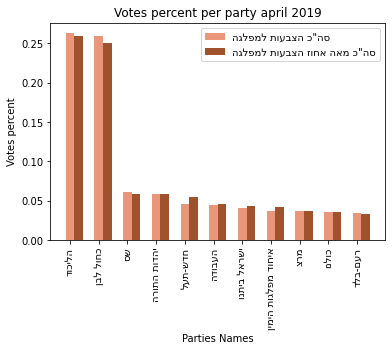

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965d53af98>)

In [ ]:
#for 2019 april city data

#fix according to lab 2
v2_apr19 = df_apr_2019_city_raw['כשרים'].div(df_apr_2019_city_raw['בזב'])
fixed_data2_apr19 = df_apr_city_2019.div(v2_apr19 , axis = 'rows')

votes2_apr19 = votes_percents(df_apr_city_2019, 0.0325)  # total votes for each party
big_parties_names2_apr19 = votes2_apr19.keys()

# Bar plot for a party, only showing values above a certain threshold after fixing:
party_bar(df_apr_city_2019, fixed_data2_apr19, 0.0325,'Votes percent per party april 2019')

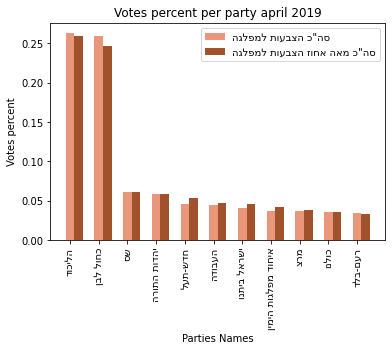

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f966c4b89b0>)

In [ ]:
#for 2019 april kapli data  

#fix according to lab 2
v_apr19 = df_apr_2019_kalpi_raw['כשרים'].div(df_apr_2019_kalpi_raw['בזב'])
fixed_data_apr19 = df_apr_2019.div(v_apr19 , axis = 'rows')

votes_apr19 = votes_percents(df_apr_2019, 0.0325)  # total votes for each party
big_parties_names_apr19 = votes_apr19.keys()

# Bar plot for a party, only showing values above a certain threshold after fixing:
party_bar(df_apr_2019, fixed_data_apr19, 0.0325,'Votes percent per party april 2019')

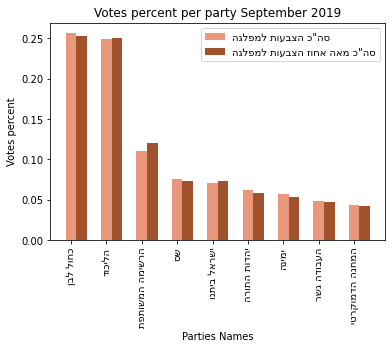

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965e5b5cc0>)

In [ ]:
#for september 2019 city data
#fix according to lab 2
v_2019 = df_2019_raw['כשרים'].div(df_2019_raw['בזב'])
fixed_data_2019 = df_2019.div(v_2019 , axis = 'rows')

# Bar plot for a party, only showing values above a certain threshold after fixing:
party_bar(df_2019, fixed_data_2019, 0.0325,'Votes percent per party September 2019')

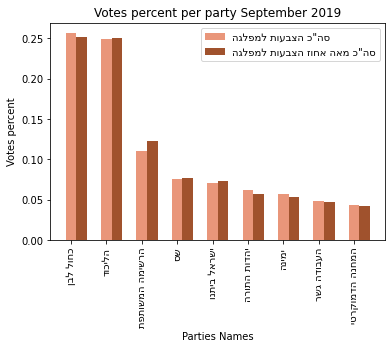

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965d4e3748>)

In [ ]:
#Qc - for september 2019 kalpi data
v2_2019 = df_2019_kalpi_raw['כשרים'].div(df_2019_kalpi_raw['בזב'])
fixed_data2_2019 = df_2019_kalpi.div(v2_2019, axis = "rows")

# Bar plot for a party, only showing values above a certain threshold after fixing:
party_bar(df_2019_kalpi, fixed_data2_2019, 0.0325,'Votes percent per party September 2019')

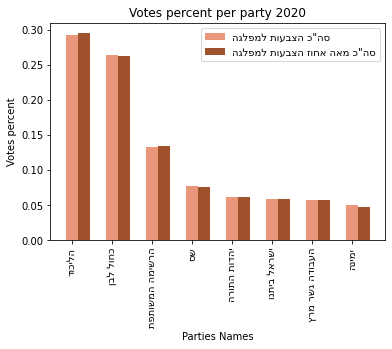

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965d3253c8>)

In [ ]:
#for 2020 city data
#fix according to lab 2
v_2020 = df_2020_raw['כשרים'].div(df_2020_raw['בזב'])
fixed_data_2020 = df_2020.div(v_2020 , axis = 'rows')

votes_2020 = votes_percents(df_2020, 0.0325)  # total votes for each party
big_parties_names = votes_2020.keys()

# Bar plot for a party, only showing values above a certain threshold after fixing:
party_bar(df_2020, fixed_data_2020, 0.0325,'Votes percent per party 2020')

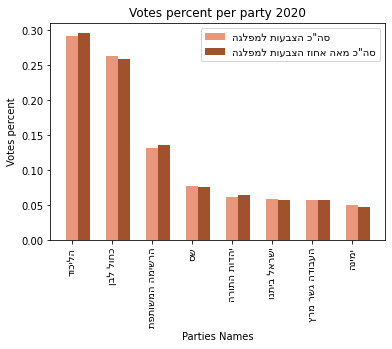

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965d6cd5f8>)

In [ ]:
#for 2020 kalpi data

#fix according to lab 2
v2_2020 = df_2020_kalpi_raw['כשרים'].div(df_2020_kalpi_raw['בזב'])
fixed_data2_2020 = df_2020_kalpi.div(v2_2020 , axis = 'rows')

votes2_2020 = votes_percents(df_2020_kalpi, 0.0325)  # total votes for each party
big_parties_names2 = votes2_2020.keys()

# Bar plot for a party, only showing values above a certain threshold after fixing:
party_bar(df_2020_kalpi, fixed_data2_2020, 0.0325,'Votes percent per party 2020')

In [ ]:
#Loading elections eshkol Hevrati Calcali data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()
df_socio = pd.read_csv(io.BytesIO(uploaded['Eshkol Hevrati Calcali.csv']), index_col='name')

# Create a merged data frame by using the pandas join commend:
merged_df = df_2020_kalpi_raw.join(df_socio.set_index('set_code'), on='סמל ישוב')

Saving Eshkol Hevrati Calcali.csv to Eshkol Hevrati Calcali (2).csv


Qd - The voter population of the Shas party


In [ ]:
#help function for Qd 
#compar party bar
def party_bar2(df1, df2, title):
    width = 0.3  # set column width 
    n = len(df1)  
    names = df1.index

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  

    x1 = ax.bar(np.arange(n), list(df1["שס"]), width, color='darksalmon')
    x2 = ax.bar(np.arange(n)+width, list(df2["שס"]), width, color='sienna')

    ax.set_ylabel('Votes')
    ax.set_title(title)
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=45)
    ax.legend((x1[0], x2[0]), ("sep 2019", '2020'))
    plt.show()

    return fig, ax

#compar party scatter plot
def two_parties_scatter(df, party1, party2, title):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city 
    party_share2 = df[party2] / votes_per_city 

    area = df["מצביעים"] / max(df["מצביעים"])*200

    np.random.seed(19680801)
    N = 1214  #number of the cities
    plt.scatter(party_share1, party_share2, c="darksalmon",s=area, alpha=0.5)  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title(title)
    plt.show()

#create corr heat map between all pairs of patries
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('Oranges'))
    n = corr_mat.shape[0]   
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation = 90)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) 
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

#subplots for each eshkol
def votes_percent_by_socio(df):

    fig, ax = plt.subplots(2, 5, figsize=(20,8))
    names_r = [n[::-1] for n in names20]
    x = names20
    for eshkol in range(10):      
        ax[eshkol//5, eshkol%5].bar(x, df.loc[eshkol+1],color='darksalmon')
        ax[eshkol//5, eshkol%5].set_title("Eshkol " + str(eshkol+1), fontsize=14)
    
    for ax in ax.flat:
        ax.set_xticklabels(names_r, rotation=90, fontsize=10)
        ax.set_ylabel('percent per party', fontsize=12)

    fig.tight_layout()     
    plt.show()
    return fig, ax

# subplots for each party by socio Eshkol function
def votes_percent_per_party_socio(df):
    fig, ax = plt.subplots(2, 4, figsize=(20,10))
    n = 10
    names_rev = [n[::-1] for n in names20]
    for party in range(8):    
        ax[party//4, party%4].bar(np.arange(n), df[names20[party]],color='darksalmon')
        ax[party//4, party%4].set_title(names_rev[party], fontsize=14)  
    for ax in ax.flat:
        ax.set_xticklabels(np.arange(10)+1, fontsize=12)
        ax.xaxis.set_ticks(np.arange(0, 10, 1))
        ax.set_ylabel('voting percent', fontsize=12)
        ax.set_xlabel('social Eshkol', fontsize=12)
    fig.tight_layout() 
    plt.show()
    return fig, ax


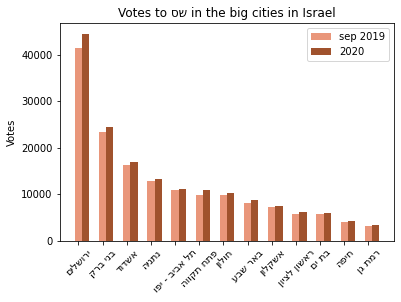

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965de53be0>)

In [ ]:
#Percentage of votes for the Shas party among its supporters
df_2019["שס"].sum()/fixed_data_2019["שס"].sum()
df_2019_kalpi["שס"].sum()/fixed_data2_2019["שס"].sum()
df_2020["שס"].sum()/fixed_data_2020["שס"].sum()
df_2020_kalpi["שס"].sum()/fixed_data2_2020["שס"].sum()

#check the votes to shas in the big cities in israel 
votes_2019 = df_2019_raw['בזב']
votes_2020 = df_2020_raw['בזב']

big_cities19 = df_2019_raw[votes_2019 >= 110000] #over 110000 bzb
big_cities20 = df_2020_raw[votes_2020 >= 110000]

#the votes to shas in the biggest cities
votes_for_shas19 = pd.DataFrame(big_cities19["שס"].sort_values(ascending=False))
votes_for_shas20 = pd.DataFrame(big_cities20["שס"].sort_values(ascending=False))
#plor the results
party_bar2(votes_for_shas19, votes_for_shas20,'Votes to סש in the big cities in Israel')

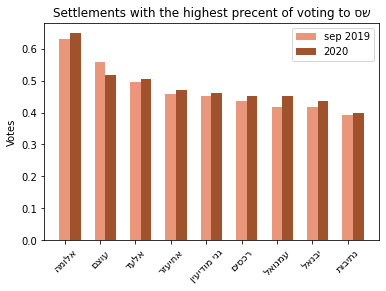

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965cd972b0>)

In [ ]:
#examine the localities in Israel where the percentage of votes for the Shas party is the highest.
df_prc_2019 = df_2019["שס"]/df_2019.sum(axis=1)
df_prc_2020 = df_2020["שס"]/df_2020.sum(axis=1)

#the cities with the highst votes to shas
precent_for_shas19 = pd.DataFrame(df_prc_2019.sort_values(ascending=False))[:10].drop("תירוש")
precent_for_shas19 = precent_for_shas19.rename(columns={0:"שס"})
precent_for_shas20 = pd.DataFrame(df_prc_2020.sort_values(ascending=False))[:10].drop("כוכב יעקב")
precent_for_shas20 = precent_for_shas20.rename(columns={0:"שס"})

#plot
party_bar2(precent_for_shas19, precent_for_shas20, 'Settlements with the highest precent of voting to סש')

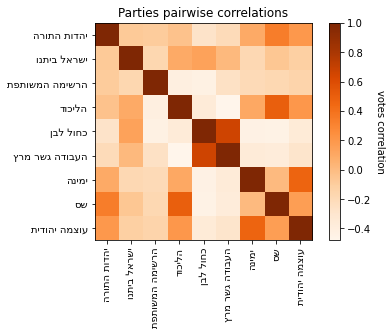

In [ ]:
#check corr between all pairs of parties
parties_corr = df_2020[df_2020[['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר מרץ', 'ימינה', 'שס',"עוצמה יהודית"]].keys()].div(df_2020_raw['כשרים'], axis = "rows")
parties_corr = parties_corr.corr()

# need to extract only top 8 parties 
heatmap_corr(parties_corr, df_2020[['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר מרץ', 'ימינה', 'שס',"עוצמה יהודית"]].keys())

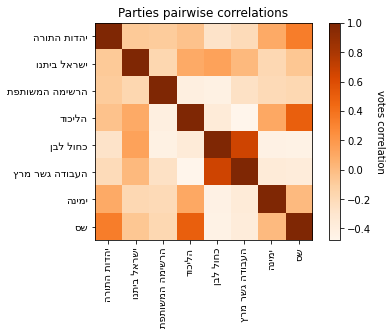

In [ ]:
#without עוצמה יהודית
#check corr between all pairs of parties
parties_corr = df_2020[df_2020_8_city.keys()].div(df_2020_raw['כשרים'], axis = "rows")
parties_corr = parties_corr.corr()

# need to extract only top 8 parties 
heatmap_corr(parties_corr, df_2020_8_city.keys())

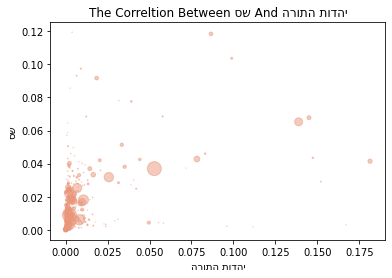

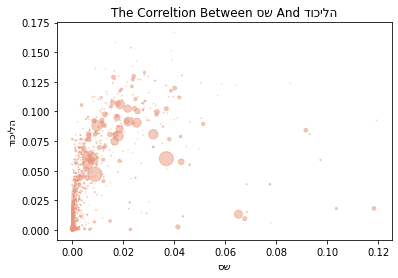

In [ ]:
#check correlation between shas and the parties that are corelated with her 
two_parties_scatter(df_2020_raw, "יהדות התורה", "שס", 'The Correltion Between סש And הרותה תודהי')
two_parties_scatter(df_2020_raw,  "שס","הליכוד",'The Correltion Between סש And דוכילה')

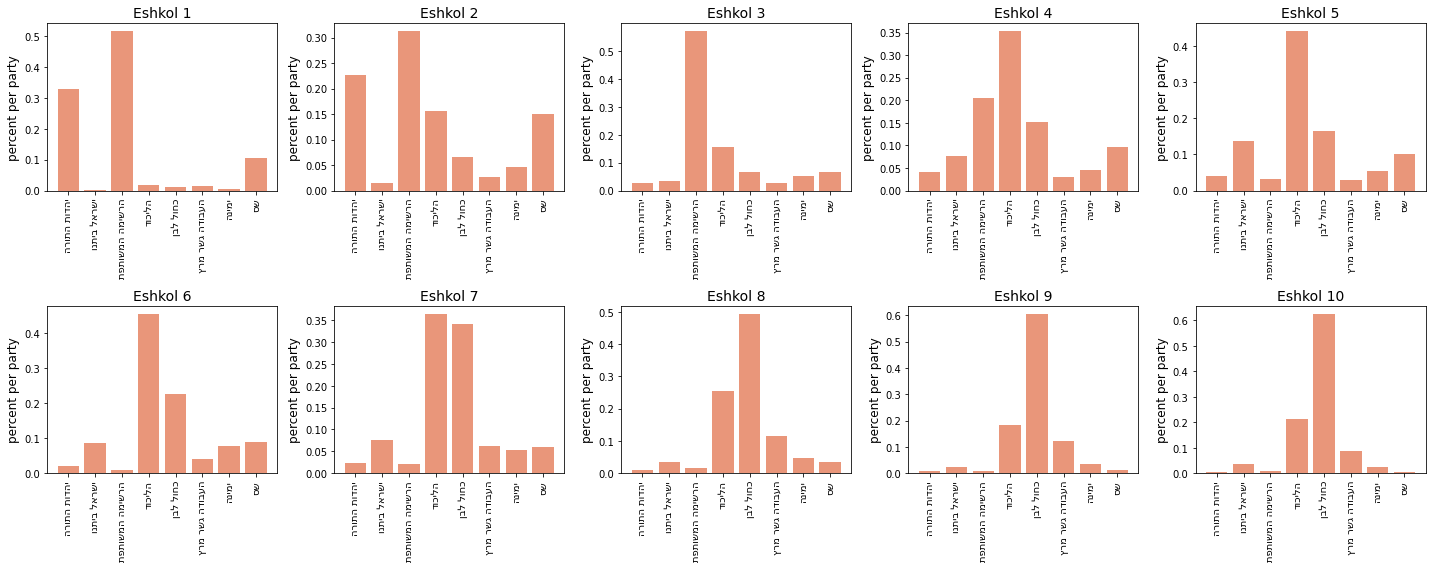

(<Figure size 1440x576 with 10 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965e47eb00>)

In [ ]:
# different socio-economic votting paterns
#Compute voting frequencies for each party and each eshkol:
p_dict = {names20[0]:list(),names20[1]:list(),names20[2]:list(),names20[3]:list(),names20[4]:list(),names20[5]:list(),names20[6]:list(),names20[7]:list()}

for eshkol in range(10):
    # Find all cities in current eshkol. You can use np.where (similar to R which)
    rel_cities = np.where(merged_df['eco_level'].values.astype('float') == eshkol+1)[0]
    # Compute parties frequencies for cities in current eshkol
    p = merged_df.iloc[rel_cities][names20].sum().div(merged_df.iloc[rel_cities][names20].sum().sum())

    parties = p.keys()
    for i in range(len(names20)):
      p_dict[parties[i]].append(p[i])
p_df = pd.DataFrame(p_dict, index=list(range(1, 11)))

# subplots for each Eshkol 
votes_percent_by_socio(p_df)

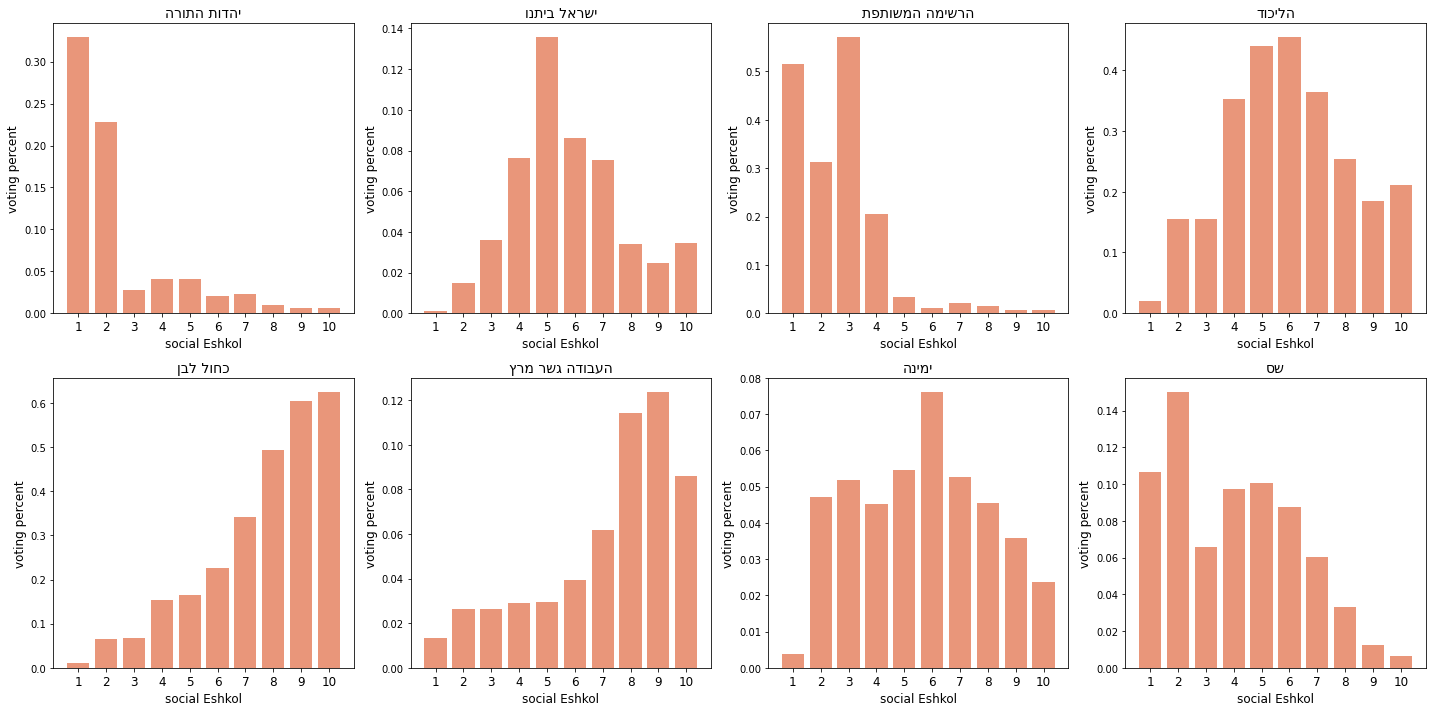

(<Figure size 1440x720 with 8 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f965ca6a160>)

In [ ]:
# subplots for each party by socio Eshkol
votes_percent_per_party_socio(p_df)

QE a - The vote for the Shas party in all ballots by the PCA

<function matplotlib.pyplot.show>

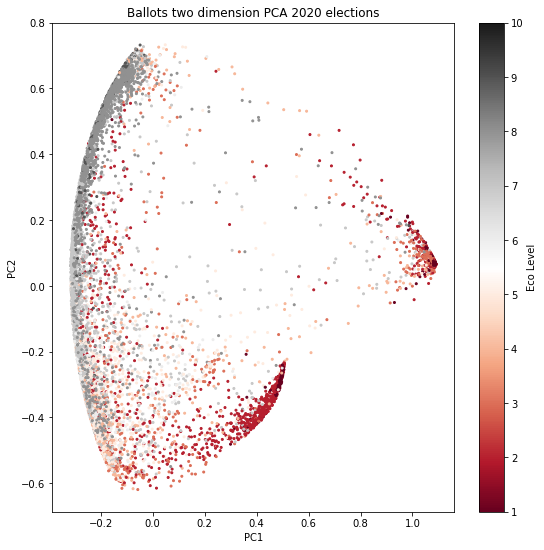

In [ ]:
#pca for 2020 kalpi+eshkol data
pca = PCA(n_components=2)  # define PCA object

#use the merge data: 2020 per kalpi with the relevant columns of socio data
merged_pca = merged_df[df_2020_8_city.keys()]
merged_pca_norm = normalize(merged_pca.T, axis=0) #normelized
X_pca = pca.fit_transform(merged_pca_norm.T)  # Perform PCA transformation

#plot
#colored by eco level
color = merged_df['eco_level']
plt.figure(figsize=(9,9))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=4,c=color, cmap = "RdGy")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ballots two dimension PCA 2020 elections')
cb = plt.colorbar()
cb.set_label("Eco Level")
plt.show

<function matplotlib.pyplot.show>

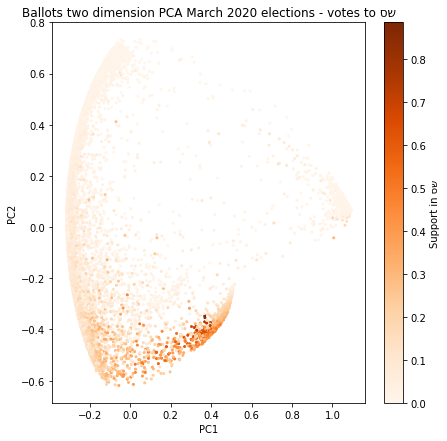

In [ ]:
# pca for 2020
pca = PCA(n_components=2)  # define PCA object

#pca 2020 per kalpi
pca2020 = df_2020_kalpi_raw[df_2020_8_kalpi.keys()]
pca2020_norm = normalize(pca2020.T, axis=0) #normalize
X_pca = pca.fit_transform(pca2020_norm.T)  # Perform PCA transformation

#colored by suppurt in shas
color = (df_2020_kalpi_raw[["שס"]].T/df_2020_kalpi_raw['כשרים']).T

#plot
plt.figure(figsize=(7,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=4,c=color["שס"], cmap = "Oranges")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ballots two dimension PCA March 2020 elections - votes to סש')
cb = plt.colorbar()
cb.set_label("Support in סש")
plt.show

<function matplotlib.pyplot.show>

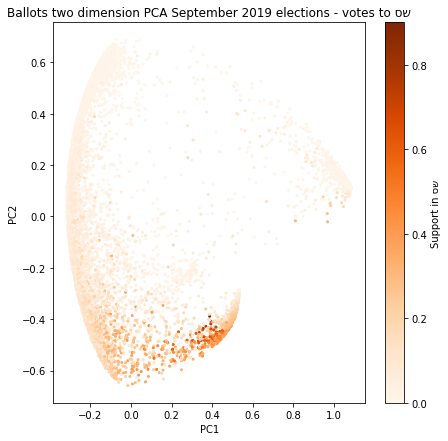

In [ ]:
#same pca for sep 2019

#set index
df_2019_kalpi_raw2 = df_2019_kalpi_raw
df_2019_kalpi_raw2.index = [str(df_2019_kalpi_raw2.index[i])+str(int(df_2019_kalpi_raw2["ברזל"][i])) for i in range(df_2019_kalpi_raw2.shape[0])] #order the index

#pca sep 2019 per kalpi
pca = PCA(n_components=2)  # define PCA object
pca_sep2019 = df_2019_kalpi_raw2[df_sep_9_kalpi.keys()]
pca_sep2019_norm = normalize(pca_sep2019.T, axis=0) #normalize
X_pca = pca.fit_transform(pca_sep2019_norm.T)  # Perform PCA transformation

#colored by support in shas
color = (df_2019_kalpi_raw2[["שס"]].T/df_2019_kalpi_raw2['כשרים']).T

#plot
plt.figure(figsize=(7,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=4,c=color["שס"], cmap = "Oranges")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ballots two dimension PCA September 2019 elections - votes to סש')
cb = plt.colorbar()
cb.set_label("Support in סש")
plt.show


<function matplotlib.pyplot.show>

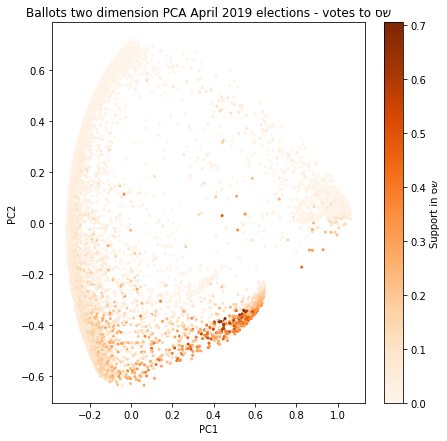

In [ ]:
#same pca for apr 2019
pca = PCA(n_components=2)  # define PCA object

#pca apr 2019 per kalpi
pca_apr2019 = df_apr_2019_kalpi_raw[df_apr_14_kalpi.keys()]
pca_apr2019_norm = normalize(pca_apr2019.T, axis=0) #normalize
X_pca = pca.fit_transform(pca_apr2019_norm.T)  # Perform PCA transformation

#colored by suppurt in shas
color = (df_apr_2019_kalpi_raw[["שס"]].T/df_apr_2019_kalpi_raw['כשרים']).T

#plot
plt.figure(figsize=(7,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=4,c=color["שס"], cmap = "Oranges")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ballots two dimension PCA April 2019 elections - votes to סש')
cb = plt.colorbar()
cb.set_label("Support in סש")
plt.show


QE b - diff 2019-2020


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show>

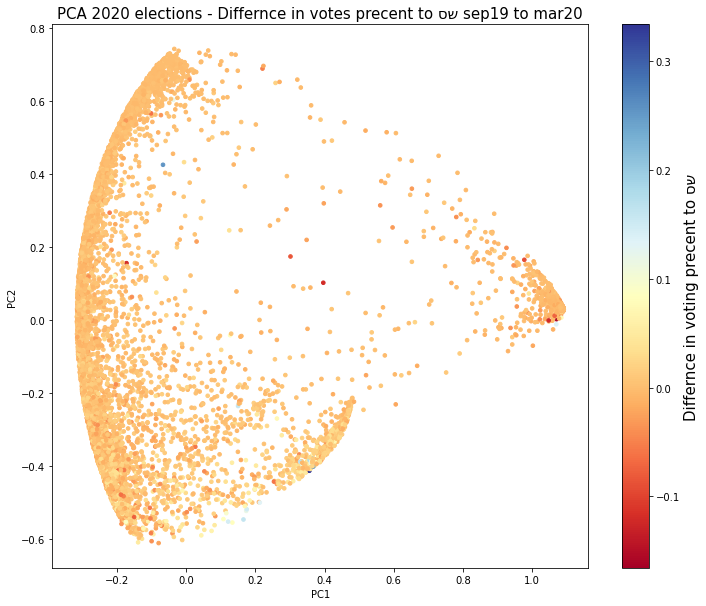

In [ ]:
#redo PCA color of each circle will indicate the percentage difference Voting at the polls between the 2020 elections, September 2019 and April 2019

#take relevant columns
df_2019_ballot = df_2019_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'המחנה הדמוקרטי',"הרשימה המשותפת", 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר', 'ימינה', 'עוצמה יהודית']].reset_index()
df_2020_ballot = df_2020_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'הרשימה המשותפת', 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר מרץ', 'ימינה', 'עוצמה יהודית']].reset_index()

#match the kalpies from sep 2019 to 2020
ballot_match = df_2019_ballot.set_index(['קלפי', 'סמל ישוב']).join(df_2020_ballot.set_index(['קלפי', 'סמל ישוב']), lsuffix = '-2019').dropna()

#seperate the data
ballot_19a = ballot_match[ballot_match.columns[0:13]]
ballot_20 = ballot_match[ballot_match.columns[13:25]]

#calculate the freq
parties_2020 = ballot_20[['הליכוד', 'כחול לבן', 'הרשימה המשותפת', 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר מרץ', 'ימינה', 'עוצמה יהודית']]
parties_2020 = parties_2020.div(parties_2020.sum(axis = 1), axis= 0)

#add precent vector
ballot_19a['אחוז הצבעה'] = ballot_19a['שס-2019']/ballot_19a['כשרים-2019']
ballot_20['אחוז הצבעה'] = ballot_20['שס']/ballot_20['כשרים']

#calculate the diff
diff2020 = ballot_20['אחוז הצבעה']-ballot_19a['אחוז הצבעה'] 

#redo pca when the color is the dofferent in the votes precent
pca = PCA(n_components=2)  # define PCA object
df_pca = parties_2020
df_pca_norm = normalize(df_pca.T, axis=0)  #normelize
X_pca = pca.fit_transform(df_pca_norm.T)  # Perform PCA transformation

#plot
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=13,c=diff2020, cmap = "RdYlBu")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2020 elections - Differnce in votes precent to סש sep19 to mar20', size = 15)
cb = plt.colorbar()
cb.set_label("Differnce in voting precent to סש", size = 15)
plt.show


QE b - diff april 2019-sep 2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function matplotlib.pyplot.show>

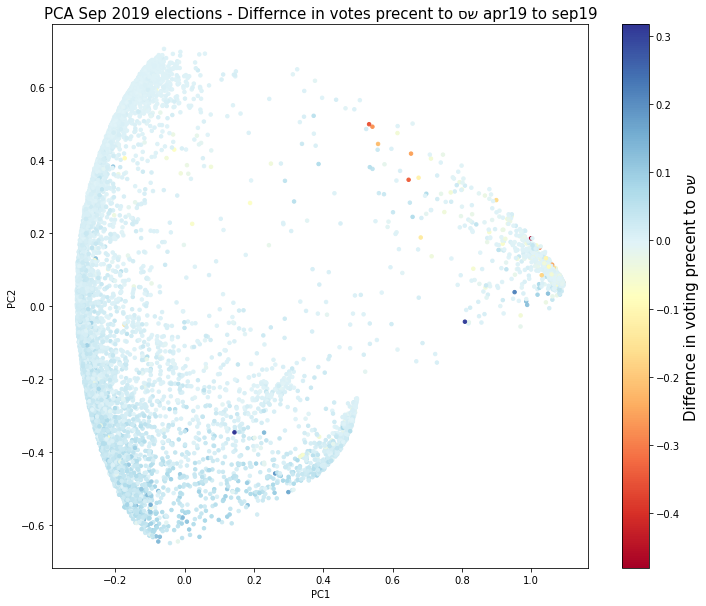

In [ ]:
#take the relevant columns 
df_apr19_ballot = df_apr_2019_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'איחוד מפלגות הימין',"רעם-בלד","חדש-תעל", 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה', 'הימין החדש',"מרצ","כולנו","זהות","נר"]].reset_index()
df_sep19_ballot = df_2019_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'שס', 'יהדות התורה', 'ישראל ביתנו', "המחנה הדמוקרטי",'העבודה גשר', 'ימינה', 'עוצמה יהודית',"הרשימה המשותפת"]].reset_index()

#match the kalpies from apr 2019 to sep 19
ballot_match2019 = df_apr19_ballot.set_index(['קלפי', 'סמל ישוב']).join(df_sep19_ballot.set_index(['קלפי', 'סמל ישוב']), lsuffix = '-A').dropna()

#seperate the data
ballot_apr2019 = ballot_match2019[ballot_match2019.columns[0:18]]
ballot_sep2019 = ballot_match2019[ballot_match2019.columns[18:30]]

#calculate the freq
parties_sep2019 = ballot_sep2019[['הליכוד', 'כחול לבן', 'שס', 'יהדות התורה', 'ישראל ביתנו', "המחנה הדמוקרטי",'העבודה גשר', 'ימינה', 'עוצמה יהודית',"הרשימה המשותפת"]]
parties_sep2019 = parties_sep2019.div(parties_sep2019.sum(axis = 1), axis= 0)

#add precent vector
ballot_apr2019['אחוז הצבעה'] = ballot_apr2019['שס-A']/ballot_apr2019['כשרים-A']
ballot_sep2019['אחוז הצבעה'] = ballot_sep2019['שס']/ballot_sep2019['כשרים']

#calculate the diff
diff2019 = pd.DataFrame(ballot_sep2019['אחוז הצבעה']-ballot_apr2019['אחוז הצבעה']).dropna()

#redo pca
pca = PCA(n_components=2)  # define PCA object
df_pca19 = parties_sep2019.dropna()
df_pca19_norm = normalize(df_pca19.T, axis=0) #normelize
X_pca = pca.fit_transform(df_pca19_norm.T)  # Perform PCA transformation

#plot
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=12,c=diff2019['אחוז הצבעה'], cmap = "RdYlBu")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Sep 2019 elections - Differnce in votes precent to סש apr19 to sep19', size = 15)
cb = plt.colorbar()
cb.set_label("Differnce in voting precent to סש", size = 15)
plt.show

QF+G - Vote transitions between the parties



In [ ]:
#help functions for Q f+g
#built A function is that arranges the data before the MERGE operation
def help_function(df, parties_names , no_vote=False, kalpi=None):
    df['kalpi_id'] = df['סמל ישוב'].astype(str) + '__' + df[kalpi].astype(str)
    df_city = df.index 
    df = df.set_index('kalpi_id')
    eligible_voters = df['בזב']
    total_voters = df['מצביעים']
    df = df[parties_names]
    if no_vote:
        df['לא הצביעו'] = eligible_voters - total_voters  #for Q2 add column of no voters
    return df

#heat_map
def heatmap_function(matrix, title):   
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap=plt.get_cmap("Reds"))
    ax.set_title(title)   
    ax.set_xticks(np.arange(len(matrix.index)))
    ax.set_yticks(np.arange(len(matrix.keys())))
    ax.set_xticklabels(names_2020_rev2)
    ax.set_yticklabels(names_2019_rev1)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right") 
    cbar = ax.figure.colorbar(im, ax=ax)
    matrix_num = matrix.to_numpy()
    plt.show()

#creat a norm function and add the condtion value less than 0.5% = 0
def norm_function(M):
    for party_two in M.keys():
      for party_one in M.index:
            if M.at[party_one, party_two] < 0.05:
                M.at[party_one, party_two] = 0
    for party in M.index:
        M.loc[party] = M.loc[party].div(M.loc[party].sum())
    return M

#Adapting data
def adapt_df(df, parties, include_no_vote=False, ballot_number_field_name=None):
    df['ballot_id'] = df['סמל ישוב'].astype(str) + '__' + df[ballot_number_field_name].astype(str)
    df_yeshuv = df.index 
    df = df.set_index('ballot_id')
    eligible_voters = df['בזב']
    total_voters = df['מצביעים']
    df = df[parties]
    df = df.reindex(sorted(df.columns), axis=1)
    if include_no_vote:
        df['לא הצביעו'] = eligible_voters - total_voters
    return df

#corr heatmap function with text
def corr_heat_map(M,parties_2020, parties_2019,year1,year2):
    n_20 = len(parties_2020)
    n_19 = len(parties_2019)

    fig, ax = plt.subplots(figsize = (9,9))
    im = ax.imshow(M, cmap=plt.get_cmap('Oranges'))

    ax.set_title("Changes in votes")
    ax.set_xticks(np.arange(n_20))
    ax.set_yticks(np.arange(n_19))
    # And to label them with the relevant parties names
    ax.set_xticklabels([n[::-1] for n in parties_2020], rotation = 45)
    ax.set_yticklabels([n[::-1] for n in parties_2019])
    ax.set_xlabel(year1)
    ax.set_ylabel(year2)

    # Loop over data dimensions to create text annotations.
    for i in range(n_19):
        for j in range(n_20):
           text = ax.text(j, i, round(M[i, j], 3), ha="center", va="center", color="black")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('votes probability', rotation=-90, va="bottom")

    plt.show()


Transition of votes from 2019 to 2020


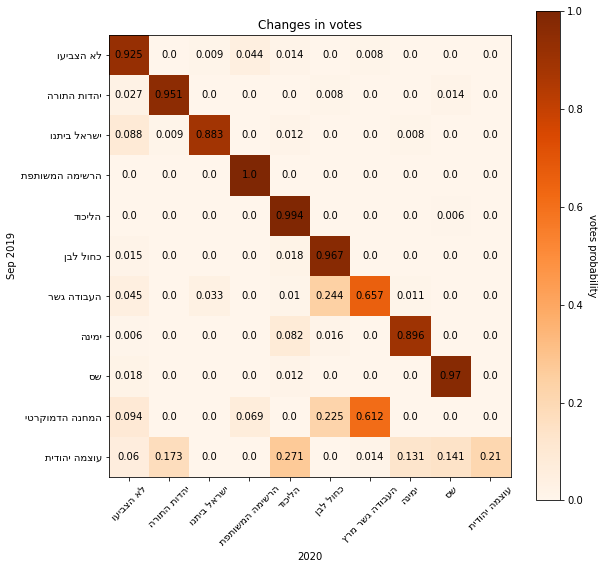

In [ ]:
#create provins matrix for votes transition from sep 2019 to 2020
big_2019 =  ['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר', 'ימינה', 'שס',"המחנה הדמוקרטי","עוצמה יהודית"]
big_2020 = ['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר מרץ', 'ימינה', 'שס',"עוצמה יהודית"]

#adapting data:
ballot_2019 = adapt_df(df_2019_kalpi_raw , big_2019, True,"קלפי")
ballot_2020 = adapt_df(df_2020_kalpi_raw,big_2020, True, "קלפי")

# merging the two election dataframes to find the shared ballots-
index_match = ballot_2019.merge(ballot_2020, how = 'inner',on="ballot_id",suffixes =( "- 2019","- 2020"))
index_match = index_match.index

# only shared ballots:
ballot_2020 = ballot_2020.loc[index_match]
ballot_2019 = ballot_2019.loc[index_match]

#add the non votes party
n_a_nv, n_b_nv = ballot_2019, ballot_2020
n_a_nv = n_a_nv[['לא הצביעו','יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר', 'ימינה', 'שס',"המחנה הדמוקרטי","עוצמה יהודית"]]
n_b_nv = n_b_nv[['לא הצביעו','יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר מרץ', 'ימינה', 'שס',"עוצמה יהודית"]]

#set columns
parties_2019_nv = n_a_nv.columns
parties_2020_nv = n_b_nv.columns

#creating matrix of votes
n_a_nv = n_a_nv.values
n_b_nv = n_b_nv.values

# Calculating M
M_2 = np.linalg.inv(n_a_nv.T @ n_a_nv) @n_a_nv.T @ n_b_nv 

# applying constraints:
M_2 = pd.DataFrame(np.where(M_2 < 0.005, 0, M_2))
M_2 =M_2.div(M_2.sum(axis = 1), 0)

#plot
corr_heat_map(np.array(M_2), parties_2020_nv, parties_2019_nv,"2020","Sep 2019")

Transition of votes from april 2019 to september 2019

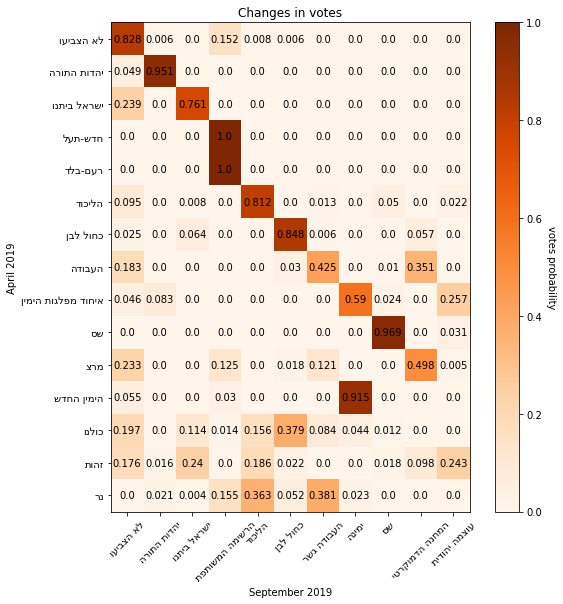

In [ ]:
#create provins matrix for votes transition from apr 2019 to sep 2019
big_2019a =["יהדות התורה", "ישראל ביתנו", 'חדש-תעל','רעם-בלד',"הליכוד" ,"כחול לבן","העבודה","איחוד מפלגות הימין","שס","מרצ","הימין החדש","כולנו","זהות","נר"]
big_2019b =  ['יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר', 'ימינה', 'שס',"המחנה הדמוקרטי","עוצמה יהודית"]
  
# adapting data:
ballot_2019a = adapt_df(df_apr_2019_kalpi_raw,big_2019a, True, "קלפי")
ballot_2019b = adapt_df(df_2019_kalpi_raw , big_2019b, True,"קלפי")

# merging the two election dataframes to find the shared ballots-
index_match = ballot_2019a.merge(ballot_2019b, how = 'inner',on="ballot_id",suffixes =( "- 2019","- 2020"))
index_match = index_match.index

# only shared ballots:
ballot_2019b = ballot_2019b.loc[index_match]
ballot_2019a = ballot_2019a.loc[index_match]

#add the non votes party
n_a_nv, n_b_nv = ballot_2019a, ballot_2019b
n_a_nv = n_a_nv[["לא הצביעו","יהדות התורה", "ישראל ביתנו", 'חדש-תעל','רעם-בלד',"הליכוד" ,"כחול לבן","העבודה","איחוד מפלגות הימין","שס","מרצ","הימין החדש","כולנו","זהות","נר"]]
n_b_nv = n_b_nv[['לא הצביעו','יהדות התורה', 'ישראל ביתנו', 'הרשימה המשותפת', 'הליכוד', 'כחול לבן','העבודה גשר', 'ימינה', 'שס',"המחנה הדמוקרטי","עוצמה יהודית"]]

#set columns names
parties_2019a_nv = n_a_nv.columns
parties_2019b_nv = n_b_nv.columns

#creating matrix of votes
n_a_nv = n_a_nv.values
n_b_nv = n_b_nv.values

# Calculating M
M_2 = np.linalg.inv(n_a_nv.T @ n_a_nv) @n_a_nv.T @ n_b_nv 

# applying constraints:
M_2 = pd.DataFrame(np.where(M_2 < 0.005, 0, M_2))
M_2 =M_2.div(M_2.sum(axis = 1), 0)

#plot
corr_heat_map(np.array(M_2),parties_2019b_nv, parties_2019a_nv,"September 2019","April 2019")

Q h - Suspicious polling stations 


In [ ]:
#funcitions for Q h
#bar plots for the kalpies
def bar_plots(parties_2019, parties_2020, tops,year1,year2):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 
  votes_2019 = parties_2019.loc[tops]  
  votes_2020 = parties_2020.loc[tops]

  names = votes_2020.keys()
  rev_names = [name[::-1] for name in list(names)]
  n = len(parties_2019.columns)

  for ballot in range(10):
    bar_2019 = ax[ballot//5, ballot%5].bar(np.arange(n), list(votes_2019.iloc[ballot]), width, color='darksalmon')
    bar_2020 = ax[ballot//5, ballot%5].bar(np.arange(n)+width, list(votes_2020.iloc[ballot]), width, color='sienna')
    ax[ballot//5, ballot%5].set_title(ballot_2020.loc[tops[ballot], 'שם ישוב'][::-1] + " " + str(tops[ballot][0]) , fontsize=14)
    #add text
    ax[ballot//5, ballot%5].set_xticks(np.arange(n))
    ax[ballot//5, ballot%5].set_xticklabels(rev_names, rotation =90 )
    ax[ballot//5, ballot%5].legend((bar_2020[0], bar_2019[0]),
                                   (year1+': ' + 'םירשכ- '+ str(ballot_2020.loc[tops[ballot], 'כשרים']) +
                                     ', בזב- ' + str(ballot_2020.loc[tops[ballot], 'בזב']), 
                                    year2+': ' + 'םירשכ- '+ str(ballot_2019.loc[tops[ballot], 'כשרים']) +
                                     ', בזב- ' + str(ballot_2019.loc[tops[ballot], 'בזב'])))
    
  for ax in ax.flat:
    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    
  plt.tight_layout()
  plt.show()


analysis 2019 - 2020

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MultiIndex([( 17.0, 3000),
            (  3.0,  485),
            (832.0, 3000),
            ( 32.0, 3000),
            ( 16.0, 3000),
            ( 15.0, 3000),
            ( 18.0, 3000),
            ( 12.0, 3000),
            (  5.0,  490),
            (  2.0,  696)],
           names=['קלפי', 'סמל ישוב'])


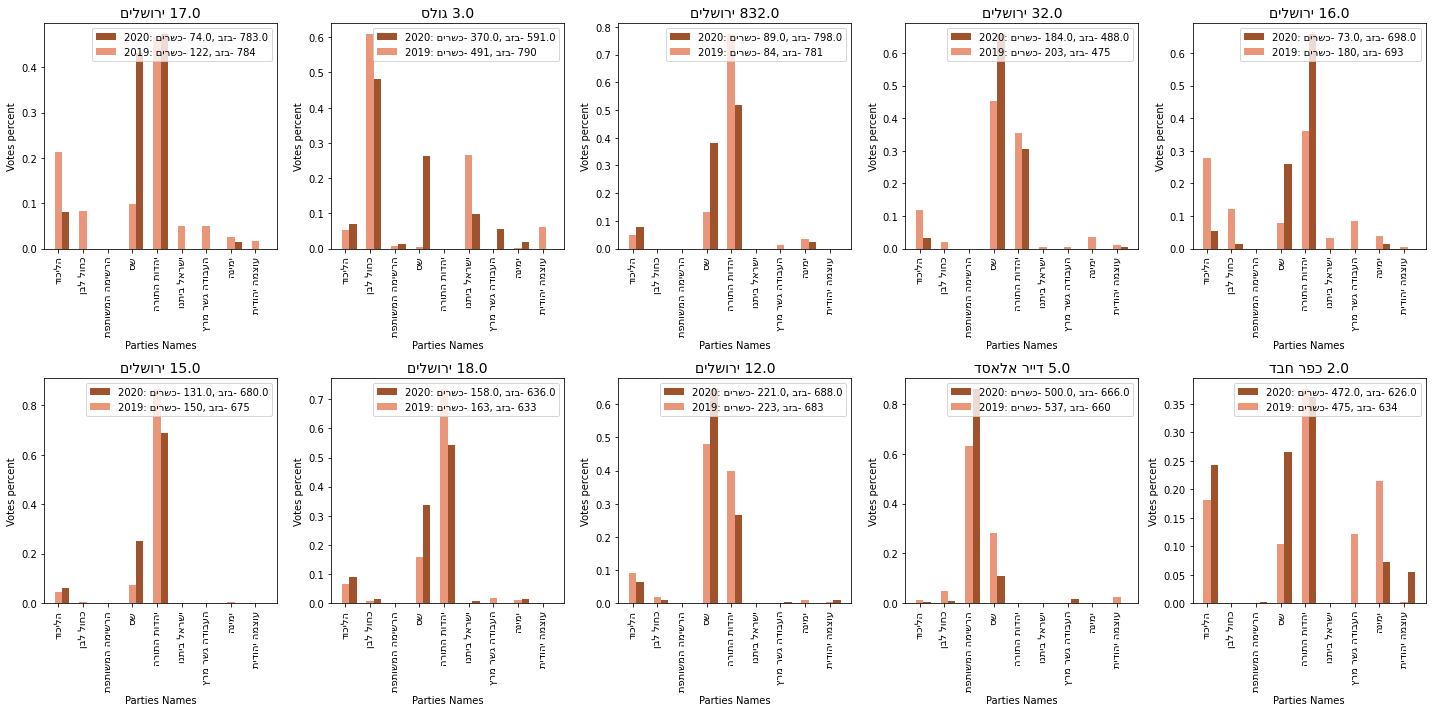

In [ ]:
#take the relevant columns 
df_2019_ballot = df_2019_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'המחנה הדמוקרטי',"הרשימה המשותפת", 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר', 'ימינה', 'עוצמה יהודית']].reset_index()
#combine the two parties together to fit 2020
df_2019_ballot["העבודה גשר מרץ"] = df_2019_ballot["המחנה הדמוקרטי"] + df_2019_ballot["העבודה גשר"]
df_2019_ballot = df_2019_ballot.drop(columns = ["המחנה הדמוקרטי","העבודה גשר"])

#take the relevant columns 
df_2020_ballot = df_2020_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'הרשימה המשותפת', 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר מרץ', 'ימינה', 'עוצמה יהודית']].reset_index()

#Adapting data so we will have only ballots that were in 2019 and in 20   
#match the kalpies from sep 2019 to 2020
ballot_match = df_2019_ballot.set_index(['קלפי', 'סמל ישוב']).join(df_2020_ballot.set_index(['קלפי', 'סמל ישוב']), lsuffix = '-2019').dropna()

#seperate the data
ballot_2019 = ballot_match[ballot_match.columns[0:12]]
ballot_2020 = ballot_match[ballot_match.columns[12:25]]
ballot_2019.columns = ballot_2020.columns

#freq calculations:
parties_2019 = ballot_2019[['הליכוד', 'כחול לבן', 'הרשימה המשותפת', 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר מרץ', 'ימינה', 'עוצמה יהודית']]
parties_2019 = parties_2019.div(parties_2019.sum(axis = 1), axis = 0)
parties_2020 = ballot_2020[['הליכוד', 'כחול לבן', 'הרשימה המשותפת', 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה גשר מרץ', 'ימינה', 'עוצמה יהודית']]
parties_2020 = parties_2020.div(parties_2020.sum(axis = 1), axis= 0)

#add column -  votes precent to shas 
ballot_2019['אחוז הצבעה לשס'] = ballot_2019['שס']/ballot_2019['כשרים']
ballot_2020['אחוז הצבעה לשס'] = ballot_2020['שס']/ballot_2020['כשרים']

#Ten ballots with the largest distance between their avrage voting to shas between the two elections
top_10_d = abs(ballot_2019['אחוז הצבעה לשס'] - ballot_2020['אחוז הצבעה לשס']).nlargest(10).index
print(top_10_d)

#plot
bar_plots(parties_2019, parties_2020, top_10_d,"2020","2019")

analysis april 2019 - september 2020

In [ ]:
#Adapting data so we will have only parties that were in sep 2019
df_apr19_ballot = df_apr_2019_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'איחוד מפלגות הימין',"רעם-בלד","חדש-תעל", 'שס', 'יהדות התורה', 'ישראל ביתנו', 'העבודה', 'הימין החדש',"מרצ","כולנו","זהות","נר"]].reset_index()
df_apr19_ballot = df_apr19_ballot.rename(columns={"מרצ":"המחנה הדמוקרטי"})
df_apr19_ballot["העבודה גשר"] = df_apr19_ballot["העבודה"] + df_apr19_ballot["נר"]
df_apr19_ballot["ימינה"] = df_apr19_ballot["הימין החדש"]+ (df_apr19_ballot["זהות"] + df_apr19_ballot["איחוד מפלגות הימין"])*0.5
df_apr19_ballot["עוצמה יהודית"] = df_apr19_ballot["איחוד מפלגות הימין"]*0.5
df_apr19_ballot["הרשימה המשותפת"] = df_apr19_ballot["רעם-בלד"] + df_apr19_ballot["חדש-תעל"]
df_apr19_ballot["הליכוד"] = df_apr19_ballot["כולנו"] + df_apr19_ballot["הליכוד"]+ df_apr19_ballot["זהות"]*0.5
df_apr19_ballot = df_apr19_ballot.drop(columns = ["איחוד מפלגות הימין","העבודה","נר","זהות","חדש-תעל","רעם-בלד","הימין החדש","כולנו"])

#take the relevant columns 
df_sep19_ballot = df_2019_kalpi_raw[['סמל ישוב', 'קלפי', 'בזב', 'כשרים', 'הליכוד', 'כחול לבן', 'שס', 'יהדות התורה', 'ישראל ביתנו', "המחנה הדמוקרטי",'העבודה גשר', 'ימינה', 'עוצמה יהודית',"הרשימה המשותפת"]].reset_index()

#match the kalpies from apr 2019 to sep 19
ballot_match2019 = df_apr19_ballot.set_index(['קלפי', 'סמל ישוב']).join(df_sep19_ballot.set_index(['קלפי', 'סמל ישוב']), lsuffix = '-A').dropna()

#seperate the data
ballot_apr2019 = ballot_match2019[ballot_match2019.columns[0:13]]
ballot_sep2019 = ballot_match2019[ballot_match2019.columns[13:26]]
ballot_apr2019.columns = ballot_sep2019.columns

#freq calculations:
parties_apr2019 = ballot_apr2019[['הליכוד', 'כחול לבן', 'שס', 'יהדות התורה', 'ישראל ביתנו', "המחנה הדמוקרטי",'העבודה גשר', 'ימינה', 'עוצמה יהודית',"הרשימה המשותפת"]]
parties_apr2019 = parties_apr2019.div(parties_apr2019.sum(axis = 1), axis = 0)
parties_sep2019 = ballot_sep2019[['הליכוד', 'כחול לבן', 'שס', 'יהדות התורה', 'ישראל ביתנו', "המחנה הדמוקרטי",'העבודה גשר', 'ימינה', 'עוצמה יהודית',"הרשימה המשותפת"]]
parties_sep2019 = parties_sep2019.div(parties_sep2019.sum(axis = 1), axis= 0)

#add precent vector
ballot_apr2019['אחוז הצבעה'] = ballot_apr2019['שס']/ballot_apr2019['כשרים']
ballot_sep2019['אחוז הצבעה'] = ballot_sep2019['שס']/ballot_sep2019['כשרים']

#Ten ballots with the largest distance between their avrage voting to shas between the two elections
top_10_d2 = abs(ballot_apr2019['אחוז הצבעה'] - ballot_sep2019['אחוז הצבעה']).nlargest(11).index
top = top_10_d2[:6]
tail = top_10_d2[7:]
top_10 = top.append(tail)
print(top_10)

MultiIndex([( 1.0,  652),
            (15.0, 1327),
            ( 1.0,  338),
            ( 3.0, 1359),
            ( 2.0, 1170),
            ( 2.0, 4501),
            ( 2.0,  652),
            ( 1.0, 1320),
            ( 2.0, 1359),
            ( 3.0, 1170)],
           names=['קלפי', 'סמל ישוב'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


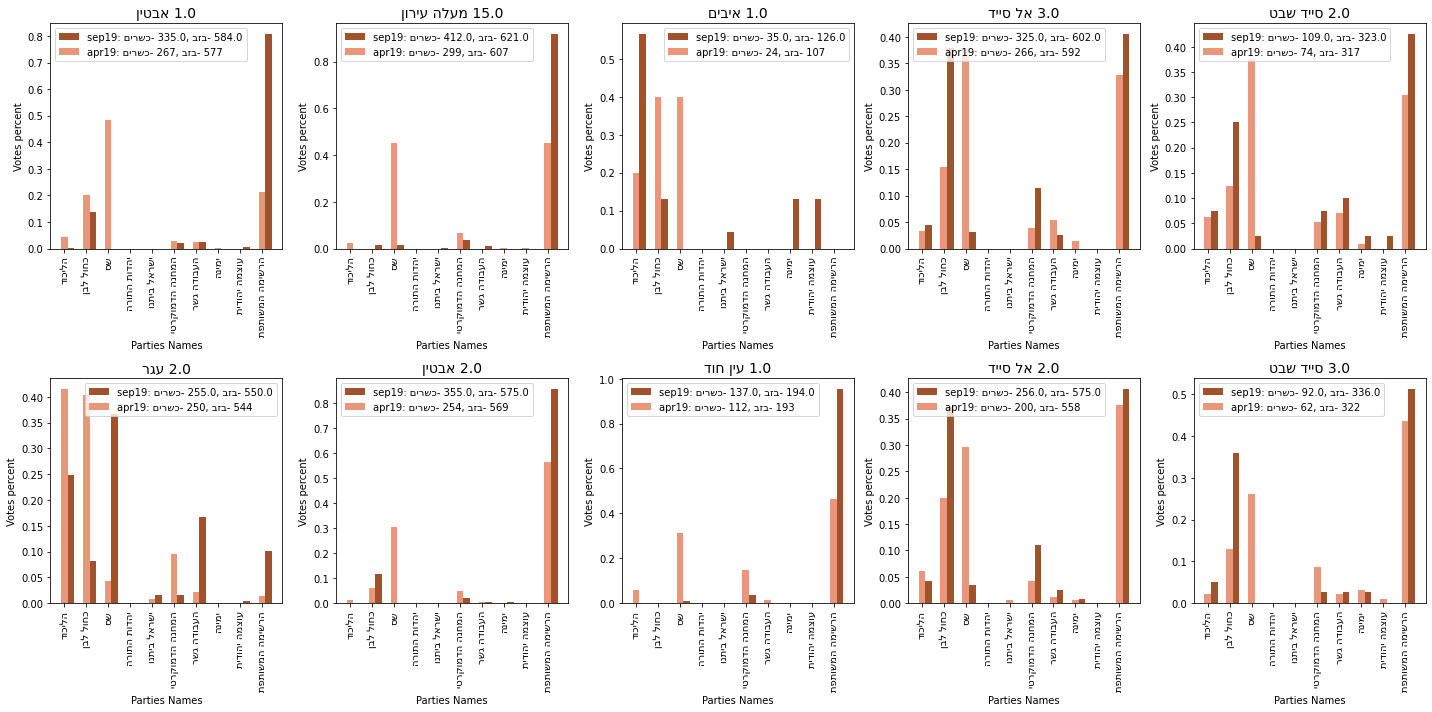

In [ ]:
bar_plots(parties_apr2019, parties_sep2019, top_10,"sep19","apr19")

In [ ]:
#Another calculation for finding unusual ballot boxes

#calculate the diff in votes precent to shas in the elections
diff_3 = pd.DataFrame(abs(abs(parties_apr2019["שס"] - parties_2019["שס"]) -abs(parties_2019["שס"]-parties_2020["שס"]) ).nlargest(5))
table = ballot_2020.loc[diff_3.index]

#create results table
table["הפרש הצבעה ב3 המועדים"] = diff_3
table = table[["שם ישוב","הפרש הצבעה ב3 המועדים"]]
round(table,3) #show results

,,שם ישוב,הפרש הצבעה ב3 המועדים
קלפי,סמל ישוב,,
1.0,652,אבטין,0.486
15.0,1327,מעלה עירון,0.417
2.0,1170,סייד שבט,0.325
1.0,338,איבים,0.314
3.0,1359,אל סייד,0.314
